In [1]:
!pip install lazypredict


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lazypredict
from lazypredict.Supervised import LazyRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

In [3]:
df_=pd.read_excel("/kaggle/input/empty-raw-2023/2023 EMPTY DWELL(RAW DATA) (V2).xlsx")
df=df_.copy()
df.head()

,CNTR_ID,FIRST_OP,OPERATION_DT,WeekofYear,WeekDay,Hour,ORG_C,DG_IMO_CLASS_C,ımoORnot,SIZE_Q,OPERATOR_C,DayOfMonth,FIRST_OP_MONTH,FIRST_OP_YEAR,DELIVERY_BOOKING_I,TYPE_C,Reefer,TOTAL_DWELL_DAYS
0,47451171,UTFF,2023-01-12 14:37:33,2,4,14,CMA CGM,0.00,0,40,CMA,12,1,2023,1,Reefer,1,40
1,47451172,UTFF,2023-01-12 14:37:59,2,4,14,CMA CGM,0.00,0,40,CMA,12,1,2023,1,Reefer,1,40
2,47451173,UTFF,2023-01-12 14:38:36,2,4,14,CMA CGM,0.00,0,40,CMA,12,1,2023,1,Reefer,1,40
3,47451174,ARIV,2023-01-12 19:37:44,2,4,19,MAERSK,8.00,1,20,MSK,12,1,2023,0,OTHERS,0,17
4,47451175,ARIV,2023-01-13 00:40:07,2,5,0,MAERSK,8.00,1,20,MSK,13,1,2023,0,OTHERS,0,16


In [4]:
df.shape

(73986, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73986 entries, 0 to 73985
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   CNTR_ID             73986 non-null  int64         
 1   FIRST_OP            73986 non-null  object        
 2   OPERATION_DT        73986 non-null  datetime64[ns]
 3   WeekofYear          73986 non-null  int64         
 4   WeekDay             73986 non-null  int64         
 5   Hour                73986 non-null  int64         
 6   ORG_C               73986 non-null  object        
 7   DG_IMO_CLASS_C      73986 non-null  float64       
 8   ımoORnot            73986 non-null  int64         
 9   SIZE_Q              73986 non-null  int64         
 10  OPERATOR_C          73986 non-null  object        
 11  DayOfMonth          73986 non-null  int64         
 12  FIRST_OP_MONTH      73986 non-null  int64         
 13  FIRST_OP_YEAR       73986 non-null  int64     

In [6]:
df.isnull().sum()

CNTR_ID               0
FIRST_OP              0
OPERATION_DT          0
WeekofYear            0
WeekDay               0
Hour                  0
ORG_C                 0
DG_IMO_CLASS_C        0
ımoORnot              0
SIZE_Q                0
OPERATOR_C            0
DayOfMonth            0
FIRST_OP_MONTH        0
FIRST_OP_YEAR         0
DELIVERY_BOOKING_I    0
TYPE_C                0
Reefer                0
TOTAL_DWELL_DAYS      0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CNTR_ID,73986.00,47843767.67,364073.72,46250595.00,47529343.25,47833137.00,48168206.50,48558335.00
WeekofYear,73986.00,6.59,3.78,1.00,3.00,6.00,10.00,13.00
WeekDay,73986.00,3.60,1.88,1.00,2.00,3.00,5.00,7.00
Hour,73986.00,12.72,5.61,0.00,9.00,13.00,17.00,23.00
DG_IMO_CLASS_C,73986.00,0.02,0.33,0.00,0.00,0.00,0.00,9.00
ımoORnot,73986.00,0.00,0.06,0.00,0.00,0.00,0.00,1.00
SIZE_Q,73986.00,33.19,9.48,20.00,20.00,40.00,40.00,40.00
DayOfMonth,73986.00,15.73,8.52,1.00,9.00,16.00,23.00,31.00
FIRST_OP_MONTH,73986.00,1.92,0.86,1.00,1.00,2.00,3.00,3.00
FIRST_OP_YEAR,73986.00,2023.00,0.00,2023.00,2023.00,2023.00,2023.00,2023.00


In [8]:
df.drop(columns=["CNTR_ID","FIRST_OP_YEAR"],axis=1,inplace=True)
df.head()

,FIRST_OP,OPERATION_DT,WeekofYear,WeekDay,Hour,ORG_C,DG_IMO_CLASS_C,ımoORnot,SIZE_Q,OPERATOR_C,DayOfMonth,FIRST_OP_MONTH,DELIVERY_BOOKING_I,TYPE_C,Reefer,TOTAL_DWELL_DAYS
0,UTFF,2023-01-12 14:37:33,2,4,14,CMA CGM,0.00,0,40,CMA,12,1,1,Reefer,1,40
1,UTFF,2023-01-12 14:37:59,2,4,14,CMA CGM,0.00,0,40,CMA,12,1,1,Reefer,1,40
2,UTFF,2023-01-12 14:38:36,2,4,14,CMA CGM,0.00,0,40,CMA,12,1,1,Reefer,1,40
3,ARIV,2023-01-12 19:37:44,2,4,19,MAERSK,8.00,1,20,MSK,12,1,0,OTHERS,0,17
4,ARIV,2023-01-13 00:40:07,2,5,0,MAERSK,8.00,1,20,MSK,13,1,0,OTHERS,0,16


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
WeekofYear,73986.00,6.59,3.78,1.00,3.00,6.00,10.00,13.00
WeekDay,73986.00,3.60,1.88,1.00,2.00,3.00,5.00,7.00
Hour,73986.00,12.72,5.61,0.00,9.00,13.00,17.00,23.00
DG_IMO_CLASS_C,73986.00,0.02,0.33,0.00,0.00,0.00,0.00,9.00
ımoORnot,73986.00,0.00,0.06,0.00,0.00,0.00,0.00,1.00
SIZE_Q,73986.00,33.19,9.48,20.00,20.00,40.00,40.00,40.00
DayOfMonth,73986.00,15.73,8.52,1.00,9.00,16.00,23.00,31.00
FIRST_OP_MONTH,73986.00,1.92,0.86,1.00,1.00,2.00,3.00,3.00
DELIVERY_BOOKING_I,73986.00,0.72,0.45,0.00,0.00,1.00,1.00,1.00
Reefer,73986.00,0.11,0.32,0.00,0.00,0.00,0.00,1.00


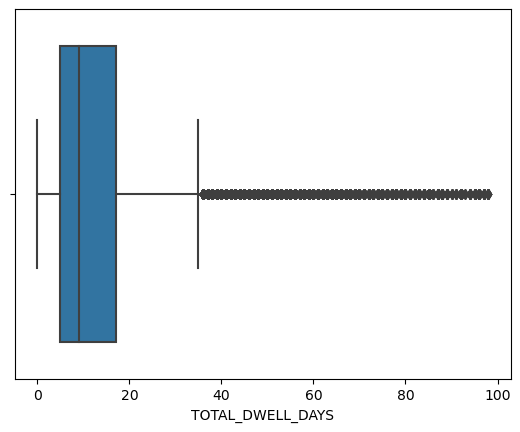

In [10]:
sns.boxplot(x=df["TOTAL_DWELL_DAYS"])
plt.show()

In [11]:
q1=df["TOTAL_DWELL_DAYS"].quantile(0.25)
q3=df["TOTAL_DWELL_DAYS"].quantile(0.75)
iqr=q3-q1
up=q3+1.5*iqr
low=q1-1.5 * iqr
print(" Low :  " + str(low) + "   " +"Up  : " + str(up))

 Low :  -13.0   Up  : 35.0


In [12]:
df["OPERATOR_C"].value_counts()

MSC      12370
CMA      10949
HL        7205
MSK       6874
ZIM       5748
ARK       5484
YML       3407
COS       2835
MED       2610
ONE       2358
AKN       2080
TRK       1944
EMC       1473
BRC       1441
COE       1081
SOWN      1068
SGL        777
ACOL       535
OOCL       520
TAR        509
MSS.       406
KCN        354
VRTX       290
ARCO       237
TRCN       229
HAS        203
HMM        173
UNR        146
ASAS       110
FES        100
LGND        93
PO          74
VOL         48
MEDL        38
BMC         37
ITT         36
RSCN        29
EMS         20
ROD         17
EMA         15
RDR         12
BSCL        10
MGL          8
CHL          6
CTM          5
LYNN         5
LNCR         4
LOT          4
LT           3
APL          2
QNL          2
MARMD        2
Name: OPERATOR_C, dtype: int64

In [13]:
df_org=df["OPERATOR_C"].value_counts()
df_org=df_org.to_frame()
df_org.head(30)

,OPERATOR_C
MSC,12370
CMA,10949
HL,7205
MSK,6874
ZIM,5748
ARK,5484
YML,3407
COS,2835
MED,2610
ONE,2358


In [14]:
del_opr=[]
stay_opr=[]
for index,row in df_org.iterrows():
    count=df_org["OPERATOR_C"][index]
    if count>499:
        stay_opr.append(index)
    else:
        del_opr.append(index)
del_opr

['MSS.',
 'KCN',
 'VRTX',
 'ARCO',
 'TRCN',
 'HAS',
 'HMM',
 'UNR',
 'ASAS',
 'FES',
 'LGND',
 'PO',
 'VOL',
 'MEDL',
 'BMC',
 'ITT',
 'RSCN',
 'EMS',
 'ROD',
 'EMA',
 'RDR',
 'BSCL',
 'MGL',
 'CHL',
 'CTM',
 'LYNN',
 'LNCR',
 'LOT',
 'LT',
 'APL',
 'QNL',
 'MARMD']

In [15]:
len(df)

73986

In [16]:
len(del_opr)

32

In [17]:
del_list=[]

for i in range(0,len(df)):
    if  df["OPERATOR_C"][i] in del_opr : 
        del_list.append(i)
df.drop(del_list , inplace=True)        

In [18]:
len(df)

71268

In [19]:
df["OPERATOR_C"].value_counts()

MSC     12370
CMA     10949
HL       7205
MSK      6874
ZIM      5748
ARK      5484
YML      3407
COS      2835
MED      2610
ONE      2358
AKN      2080
TRK      1944
EMC      1473
BRC      1441
COE      1081
SOWN     1068
SGL       777
ACOL      535
OOCL      520
TAR       509
Name: OPERATOR_C, dtype: int64

In [20]:
df.head()

,FIRST_OP,OPERATION_DT,WeekofYear,WeekDay,Hour,ORG_C,DG_IMO_CLASS_C,ımoORnot,SIZE_Q,OPERATOR_C,DayOfMonth,FIRST_OP_MONTH,DELIVERY_BOOKING_I,TYPE_C,Reefer,TOTAL_DWELL_DAYS
0,UTFF,2023-01-12 14:37:33,2,4,14,CMA CGM,0.00,0,40,CMA,12,1,1,Reefer,1,40
1,UTFF,2023-01-12 14:37:59,2,4,14,CMA CGM,0.00,0,40,CMA,12,1,1,Reefer,1,40
2,UTFF,2023-01-12 14:38:36,2,4,14,CMA CGM,0.00,0,40,CMA,12,1,1,Reefer,1,40
3,ARIV,2023-01-12 19:37:44,2,4,19,MAERSK,8.00,1,20,MSK,12,1,0,OTHERS,0,17
4,ARIV,2023-01-13 00:40:07,2,5,0,MAERSK,8.00,1,20,MSK,13,1,0,OTHERS,0,16


In [21]:
up

35.0

In [22]:
for index,row in df.iterrows():
    dwell=df["TOTAL_DWELL_DAYS"][index]
    if dwell>up:
        df.drop(index,axis=0,inplace=True)
    
df.describe().T    

,count,mean,std,min,25%,50%,75%,max
WeekofYear,66366.00,6.75,3.82,1.00,3.00,7.00,10.00,13.00
WeekDay,66366.00,3.60,1.87,1.00,2.00,3.00,5.00,7.00
Hour,66366.00,12.67,5.65,0.00,9.00,13.00,17.00,23.00
DG_IMO_CLASS_C,66366.00,0.01,0.24,0.00,0.00,0.00,0.00,9.00
ımoORnot,66366.00,0.00,0.06,0.00,0.00,0.00,0.00,1.00
SIZE_Q,66366.00,33.18,9.48,20.00,20.00,40.00,40.00,40.00
DayOfMonth,66366.00,15.80,8.47,1.00,9.00,16.00,23.00,31.00
FIRST_OP_MONTH,66366.00,1.95,0.86,1.00,1.00,2.00,3.00,3.00
DELIVERY_BOOKING_I,66366.00,0.73,0.44,0.00,0.00,1.00,1.00,1.00
Reefer,66366.00,0.11,0.31,0.00,0.00,0.00,0.00,1.00


In [23]:
df["FIRST_OP"].unique()

array(['ARIV', 'UTFF', 'DISC', 'ARIW'], dtype=object)

In [24]:
for index,row in df.iterrows():
    first_op=df["FIRST_OP"][index]
    if first_op=='DISC':
        df["FIRST_OP"][index]=0
    elif  first_op=='ARIV':
        df["FIRST_OP"][index]=1   
    elif  first_op=='UTFF':
        df["FIRST_OP"][index]=2
    else :
        df["FIRST_OP"][index]=3
        
    


In [25]:
df["FIRST_OP"].unique()

array([1, 2, 0, 3], dtype=object)

In [26]:
df["FIRST_OP"]=df["FIRST_OP"].astype(int)
df["DG_IMO_CLASS_C"]=df["DG_IMO_CLASS_C"].astype(int)


In [27]:
df["TYPE_C"].unique()

array(['OTHERS', 'HC', 'DC', 'Reefer', 'Flat-OT'], dtype=object)

In [28]:
for index,row in df.iterrows():
    type_c=df["TYPE_C"][index]
    if type_c=='DC':
        df["TYPE_C"][index]=0
    elif  type_c=='HC':
        df["TYPE_C"][index]=1   
    elif  type_c=='Reefer':
        df["TYPE_C"][index]=2
    elif  type_c=='Flat-OT':
        df["TYPE_C"][index]=3
    elif  type_c=='OTHERS':
        df["TYPE_C"][index]=4    
df["TYPE_C"]=df["TYPE_C"].astype(int)
  

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66366 entries, 3 to 73983
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   FIRST_OP            66366 non-null  int64         
 1   OPERATION_DT        66366 non-null  datetime64[ns]
 2   WeekofYear          66366 non-null  int64         
 3   WeekDay             66366 non-null  int64         
 4   Hour                66366 non-null  int64         
 5   ORG_C               66366 non-null  object        
 6   DG_IMO_CLASS_C      66366 non-null  int64         
 7   ımoORnot            66366 non-null  int64         
 8   SIZE_Q              66366 non-null  int64         
 9   OPERATOR_C          66366 non-null  object        
 10  DayOfMonth          66366 non-null  int64         
 11  FIRST_OP_MONTH      66366 non-null  int64         
 12  DELIVERY_BOOKING_I  66366 non-null  int64         
 13  TYPE_C              66366 non-null  int64     

In [30]:
for index,row in df.iterrows():
    org=df["ORG_C"][index]
    if org=='TASFIYELIK':
        df.drop(index , inplace=True)    
        print(str(index) + "   deleted")
    


30357   deleted


In [31]:
df.drop(columns="ORG_C",axis=1,inplace=True)

In [32]:
df["OPERATOR_C"].nunique()

20

In [33]:
final_opr=df["OPERATOR_C"].unique().tolist()


In [34]:
final_opr_d={}
for i in range(0,len(final_opr)):
    final_opr_d[final_opr[i]]=i
final_opr_d    

{'MSK': 0,
 'HL': 1,
 'CMA': 2,
 'ZIM': 3,
 'COS': 4,
 'SGL': 5,
 'AKN': 6,
 'MSC': 7,
 'TAR': 8,
 'TRK': 9,
 'ARK': 10,
 'YML': 11,
 'OOCL': 12,
 'COE': 13,
 'SOWN': 14,
 'EMC': 15,
 'ACOL': 16,
 'ONE': 17,
 'BRC': 18,
 'MED': 19}

In [35]:
df.head()

,FIRST_OP,OPERATION_DT,WeekofYear,WeekDay,Hour,DG_IMO_CLASS_C,ımoORnot,SIZE_Q,OPERATOR_C,DayOfMonth,FIRST_OP_MONTH,DELIVERY_BOOKING_I,TYPE_C,Reefer,TOTAL_DWELL_DAYS
3,1,2023-01-12 19:37:44,2,4,19,8,1,20,MSK,12,1,0,4,0,17
4,1,2023-01-13 00:40:07,2,5,0,8,1,20,MSK,13,1,0,4,0,16
8,1,2023-01-12 14:48:22,2,4,14,0,0,40,MSK,12,1,0,1,0,31
9,2,2023-01-12 14:32:38,2,4,14,0,0,40,HL,12,1,1,1,0,4
10,2,2023-01-12 14:28:51,2,4,14,0,0,40,CMA,12,1,1,1,0,2


In [36]:
for index,row in df.iterrows():
    opr=df["OPERATOR_C"][index]
    df["OPERATOR_C"][index]=final_opr_d[opr]
df["OPERATOR_C"].unique()    

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19], dtype=object)

In [37]:
df["OPERATOR_C"]=df["OPERATOR_C"].astype(int)


In [38]:
df.drop(columns="OPERATION_DT",axis=1,inplace=True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66365 entries, 3 to 73983
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   FIRST_OP            66365 non-null  int64
 1   WeekofYear          66365 non-null  int64
 2   WeekDay             66365 non-null  int64
 3   Hour                66365 non-null  int64
 4   DG_IMO_CLASS_C      66365 non-null  int64
 5   ımoORnot            66365 non-null  int64
 6   SIZE_Q              66365 non-null  int64
 7   OPERATOR_C          66365 non-null  int64
 8   DayOfMonth          66365 non-null  int64
 9   FIRST_OP_MONTH      66365 non-null  int64
 10  DELIVERY_BOOKING_I  66365 non-null  int64
 11  TYPE_C              66365 non-null  int64
 12  Reefer              66365 non-null  int64
 13  TOTAL_DWELL_DAYS    66365 non-null  int64
dtypes: int64(14)
memory usage: 9.6 MB


In [40]:
df.reset_index(inplace=True)

In [41]:
df.drop(columns="index", axis=1, inplace=True)
df.head()

,FIRST_OP,WeekofYear,WeekDay,Hour,DG_IMO_CLASS_C,ımoORnot,SIZE_Q,OPERATOR_C,DayOfMonth,FIRST_OP_MONTH,DELIVERY_BOOKING_I,TYPE_C,Reefer,TOTAL_DWELL_DAYS
0,1,2,4,19,8,1,20,0,12,1,0,4,0,17
1,1,2,5,0,8,1,20,0,13,1,0,4,0,16
2,1,2,4,14,0,0,40,0,12,1,0,1,0,31
3,2,2,4,14,0,0,40,1,12,1,1,1,0,4
4,2,2,4,14,0,0,40,2,12,1,1,1,0,2


# Lazy Predict

In [42]:
df_lp=df[0:2500]

In [43]:
# kolonların ayrılması
X=df_lp.drop("TOTAL_DWELL_DAYS",axis=1)
y=df_lp["TOTAL_DWELL_DAYS"]

#train test setinni ayrılması

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1, random_state=42)

In [44]:
#reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
#models,predictions = reg.fit(X_train, X_test, y_train, y_test)

In [45]:
#models

# XGBOOST

In [46]:
# kolonların ayrılması
X=df.drop("TOTAL_DWELL_DAYS",axis=1)
y=df["TOTAL_DWELL_DAYS"]

#train test setinni ayrılması

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=21)

In [47]:
xgb_model=XGBRegressor().fit(X_train,y_train)


In [48]:
y_pred=xgb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

4.85922914993736

In [49]:
xgb_grid = {
     'colsample_bytree': [0.4, 0.5,0.6], 
     'n_estimators':[100, 200],
     'max_depth': [2,3,4],
     'learning_rate': [0.1, 0.01, 0.5]
}

xgb = XGBRegressor()
xgb_cv = GridSearchCV(xgb, 
                      param_grid = xgb_grid, 
                      cv = 10, 
                      n_jobs = -1,
                      verbose = 2)
xgb_cv.fit(X_train, y_train)

In [50]:
#xgb_cv.best_params_


In [51]:
xgb_tuned = XGBRegressor(colsample_bytree = 0.6, 
                         learning_rate = 0.5, 
                         max_depth = 10, 
                         n_estimators = 200) 

xgb_tuned = xgb_tuned.fit(X_train,y_train)

In [52]:
y_pred = xgb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

4.228736769256755

In [53]:
mean_absolute_error(y_test, y_pred)

2.368070428000826

In [54]:
df["TOTAL_DWELL_DAYS"].value_counts()

4     4974
3     4828
5     4759
6     4705
7     4322
2     3749
8     3565
11    2930
10    2813
9     2778
12    2657
13    2542
14    2311
15    2032
17    1528
16    1521
1     1434
18    1179
20    1106
21    1099
19    1094
25     942
24     908
22     770
23     769
27     731
26     656
30     518
31     472
29     461
28     442
35     421
0      377
33     346
32     340
34     286
Name: TOTAL_DWELL_DAYS, dtype: int64

In [55]:
df

,FIRST_OP,WeekofYear,WeekDay,Hour,DG_IMO_CLASS_C,ımoORnot,SIZE_Q,OPERATOR_C,DayOfMonth,FIRST_OP_MONTH,DELIVERY_BOOKING_I,TYPE_C,Reefer,TOTAL_DWELL_DAYS
0,1,2,4,19,8,1,20,0,12,1,0,4,0,17
1,1,2,5,0,8,1,20,0,13,1,0,4,0,16
2,1,2,4,14,0,0,40,0,12,1,0,1,0,31
3,2,2,4,14,0,0,40,1,12,1,1,1,0,4
4,2,2,4,14,0,0,40,2,12,1,1,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66360,2,12,5,14,0,0,40,15,24,3,1,1,0,6
66361,2,12,5,14,0,0,40,2,24,3,1,1,0,6
66362,2,12,5,14,0,0,40,2,24,3,1,1,0,6
66363,1,10,4,11,0,0,40,0,9,3,1,1,0,33


# Random Forest

In [56]:
from sklearn.ensemble import RandomForestRegressor


In [57]:
X.shape

(66365, 13)

In [58]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.10,random_state=42)


In [59]:
rf_model=RandomForestRegressor(random_state=21)
rf_model.fit(X_train,y_train)

RandomForestRegressor(random_state=21)

In [60]:
y_pred = rf_model.predict(X_test)


In [61]:
np.sqrt(mean_squared_error(y_test,y_pred))


4.001193531401552

In [62]:
mean_absolute_error(y_test, y_pred)

2.1124293176531963

In [63]:
total=0
for i in y_pred:
    total+=i
total/len(y_pred)    

10.997895607469733

<AxesSubplot:>

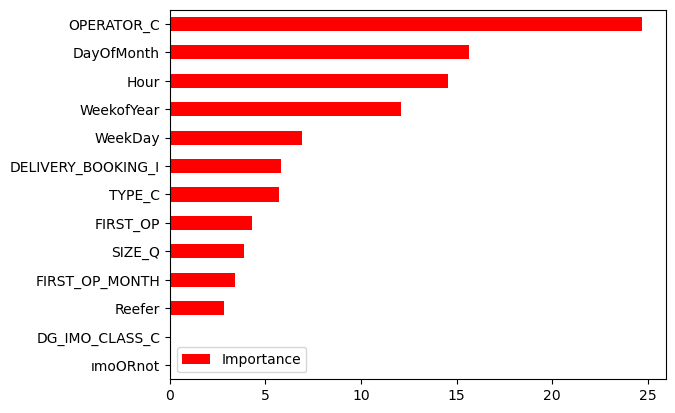

In [64]:
Importance=pd.DataFrame({"Importance":rf_model.feature_importances_*100},
                       index=X_train.columns)
Importance.sort_values(by="Importance",
                      axis=0,
                      ascending=True).plot(kind="barh",color="r")

# RF Tune

In [65]:
df_lp=df[0:5000]
# kolonların ayrılması
X=df_lp.drop("TOTAL_DWELL_DAYS",axis=1)
y=df_lp["TOTAL_DWELL_DAYS"]

#train test setinni ayrılması

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1, random_state=42)

In [66]:
rf_params={"max_depth":list(range(0,10)),
           "max_features":list(range(0,13)),
          "n_estimators":[100,200,300,400,500]}

In [67]:
rf_model=RandomForestRegressor(random_state=42)


In [68]:
rf_cv_model=GridSearchCV(rf_model,
                        rf_params,
                        cv=5,
                        n_jobs=-1)

In [69]:
#rf_cv_model.fit(X_train,y_train)


In [70]:
rf_tuned=RandomForestRegressor(max_depth= 9, max_features= 1, n_estimators=100 )


In [71]:
rf_tuned.fit(X_train,y_train)


RandomForestRegressor(max_depth=9, max_features=1)

In [72]:
y_pred=rf_tuned.predict(X_test)


In [73]:
np.sqrt(mean_squared_error(y_test,y_pred))


4.236967805302839

In [74]:
mean_absolute_error(y_test, y_pred)

2.9460655624965404

# Corr Anlysis

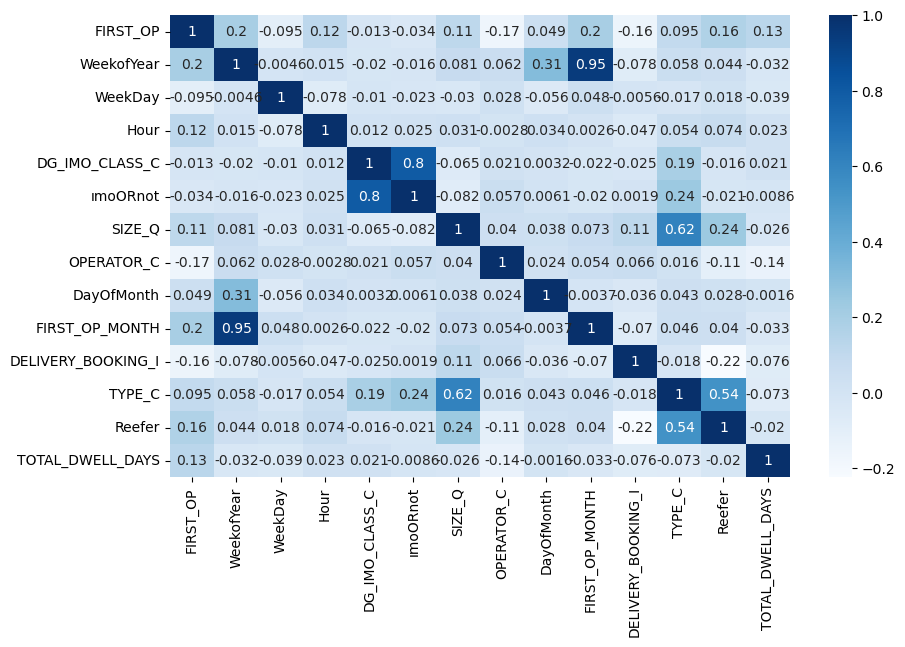

In [75]:
import seaborn as sb
plt.figure(figsize=(10,6))
corr = df.corr()
sb.heatmap(corr, cmap="Blues", annot=True)
plt.show()


# MLR

In [76]:
import statsmodels.api as sm


In [77]:
df_mlr=df[0:2500]
# kolonların ayrılması
X=df_mlr.drop("TOTAL_DWELL_DAYS",axis=1)
y=df_mlr["TOTAL_DWELL_DAYS"]

#train test setinni ayrılması

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [78]:
lm = sm.OLS(y_train,X_train)
model=lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       TOTAL_DWELL_DAYS   R-squared (uncentered):                   0.727
Model:                            OLS   Adj. R-squared (uncentered):              0.725
Method:                 Least Squares   F-statistic:                              440.6
Date:                Fri, 28 Apr 2023   Prob (F-statistic):                        0.00
Time:                        06:44:07   Log-Likelihood:                         -6764.4
No. Observations:                2000   AIC:                                  1.355e+04
Df Residuals:                    1988   BIC:                                  1.362e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
FIRST_OP               0.5625      0.241      2.334      0.020       0.090       1.035
WeekofYear            -4.9170      0.224    -21.970      0.000      -5.356      -4.478
WeekDay               -0.7460      0.094     -7.947      0.000      -0.930      -0.562
Hour                  -0.0355      0.029     -1.226      0.220      -0.092       0.021
DG_IMO_CLASS_C         0.7221      0.644      1.121      0.263      -0.542       1.986
ımoORnot               0.0903      0.081      1.121      0.263      -0.068       0.248
SIZE_Q                 0.0959      0.024      3.917      0.000       0.048       0.144
OPERATOR_C            -0.5116      0.029    -17.902      0.000      -0.568      -0.456
DayOfMonth             0.6272      0.040     15.738      0.000       0.549       0.705
FIRST_OP_MONTH        20.0442      0.898     22.312      0.000      18.282      21.806
DELIVERY_BOOKING_I    -0.8956      0.403     -2.221      0.026      -1.687      -0.105
TYPE_C                -1.5508      0.321     -4.837      0.000      -2.180      -0.922
Reefer                -2.5502      0.633     -4.027      0.000      -3.792      -1.308
==============================================================================
Omnibus:                      170.967   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.871
Skew:                           0.716   Prob(JB):                     5.44e-50
Kurtosis:                       3.820   Cond. No.                     3.03e+17
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 3.34e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [79]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [80]:
rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
rmse

7.67596852825786

In [81]:
df_p=df[["WeekofYear","WeekDay","SIZE_Q","OPERATOR_C","DayOfMonth","FIRST_OP_MONTH","TYPE_C","Reefer","TOTAL_DWELL_DAYS"]]

In [82]:
df_mlr=df_p[0:2500]
# kolonların ayrılması
X=df_mlr.drop("TOTAL_DWELL_DAYS",axis=1)
y=df_mlr["TOTAL_DWELL_DAYS"]

#train test setinni ayrılması

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [83]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)


In [84]:
rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
rmse

7.622640128347944

In [85]:
xgb_model=XGBRegressor().fit(X_train,y_train)
y_pred=xgb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))


3.8378571520615203

In [86]:
mean_absolute_error(y_test, y_pred)

2.2544090099334717

In [87]:
rf_model=RandomForestRegressor(random_state=42)
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)

In [88]:
np.sqrt(mean_squared_error(y_test, y_pred))

3.68809908698158

In [89]:
mean_absolute_error(y_test, y_pred)

2.215365041502621

In [90]:
df_mlr.describe().T

,count,mean,std,min,25%,50%,75%,max
WeekofYear,2500.00,4.29,4.09,1.00,1.00,3.00,7.00,13.00
WeekDay,2500.00,3.30,1.78,1.00,2.00,3.00,4.00,7.00
SIZE_Q,2500.00,31.95,9.81,20.00,20.00,40.00,40.00,40.00
OPERATOR_C,2500.00,7.28,6.33,0.00,1.00,7.00,13.00,19.00
DayOfMonth,2500.00,12.48,9.49,1.00,3.00,12.00,19.00,31.00
FIRST_OP_MONTH,2500.00,1.47,0.75,1.00,1.00,1.00,2.00,3.00
TYPE_C,2500.00,0.81,0.84,0.00,0.00,1.00,1.00,4.00
Reefer,2500.00,0.13,0.34,0.00,0.00,0.00,0.00,1.00
TOTAL_DWELL_DAYS,2500.00,10.96,8.36,0.00,4.00,9.00,15.00,35.00


In [91]:
df_p.describe().T

,count,mean,std,min,25%,50%,75%,max
WeekofYear,66365.00,6.75,3.82,1.00,3.00,7.00,10.00,13.00
WeekDay,66365.00,3.60,1.87,1.00,2.00,3.00,5.00,7.00
SIZE_Q,66365.00,33.18,9.48,20.00,20.00,40.00,40.00,40.00
OPERATOR_C,66365.00,6.53,5.46,0.00,2.00,6.00,10.00,19.00
DayOfMonth,66365.00,15.80,8.47,1.00,9.00,16.00,23.00,31.00
FIRST_OP_MONTH,66365.00,1.95,0.86,1.00,1.00,2.00,3.00,3.00
TYPE_C,66365.00,0.83,0.76,0.00,0.00,1.00,1.00,4.00
Reefer,66365.00,0.11,0.31,0.00,0.00,0.00,0.00,1.00
TOTAL_DWELL_DAYS,66365.00,10.91,7.93,0.00,5.00,9.00,15.00,35.00


In [92]:
df_p=df_p
# kolonların ayrılması
X=df_p.drop("TOTAL_DWELL_DAYS",axis=1)
y=df_p["TOTAL_DWELL_DAYS"]

#train test setinni ayrılması

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1, random_state=42)

In [93]:
#xgb_model=XGBRegressor().fit(X_train,y_train)
#y_pred=xgb_model.predict(X_test)
#np.sqrt(mean_squared_error(y_test, y_pred))

In [94]:
#mean_absolute_error(y_test, y_pred)

In [95]:
rf_model=RandomForestRegressor(random_state=42)
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)


In [96]:
np.sqrt(mean_squared_error(y_test, y_pred))

5.142749329567458

In [97]:
mean_absolute_error(y_test, y_pred)

3.3796320209541677

In [98]:
df_last=df[["FIRST_OP","SIZE_Q","OPERATOR_C","FIRST_OP_MONTH","TYPE_C","Reefer","TOTAL_DWELL_DAYS"]]

In [99]:
df_last_6k=df_last[-6000:]
# kolonların ayrılması
X=df_last.drop("TOTAL_DWELL_DAYS",axis=1)
y=df_last["TOTAL_DWELL_DAYS"]

#train test setinni ayrılması

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1, random_state=42)

In [100]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
FIRST_OP,66365.00,0.79,0.92,0.00,0.00,0.00,2.00,3.00
WeekofYear,66365.00,6.75,3.82,1.00,3.00,7.00,10.00,13.00
WeekDay,66365.00,3.60,1.87,1.00,2.00,3.00,5.00,7.00
Hour,66365.00,12.67,5.65,0.00,9.00,13.00,17.00,23.00
DG_IMO_CLASS_C,66365.00,0.01,0.23,0.00,0.00,0.00,0.00,9.00
ımoORnot,66365.00,0.00,0.06,0.00,0.00,0.00,0.00,1.00
SIZE_Q,66365.00,33.18,9.48,20.00,20.00,40.00,40.00,40.00
OPERATOR_C,66365.00,6.53,5.46,0.00,2.00,6.00,10.00,19.00
DayOfMonth,66365.00,15.80,8.47,1.00,9.00,16.00,23.00,31.00
FIRST_OP_MONTH,66365.00,1.95,0.86,1.00,1.00,2.00,3.00,3.00


In [101]:
lm = sm.OLS(y_train,X_train)
model=lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       TOTAL_DWELL_DAYS   R-squared (uncentered):                   0.628
Model:                            OLS   Adj. R-squared (uncentered):              0.628
Method:                 Least Squares   F-statistic:                          1.678e+04
Date:                Fri, 28 Apr 2023   Prob (F-statistic):                        0.00
Time:                        06:44:17   Log-Likelihood:                     -2.1059e+05
No. Observations:               59728   AIC:                                  4.212e+05
Df Residuals:                   59722   BIC:                                  4.212e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
FIRST_OP           1.2608      0.038     32.776      0.000       1.185       1.336
SIZE_Q             0.3002      0.003    100.980      0.000       0.294       0.306
OPERATOR_C        -0.0584      0.006     -9.459      0.000      -0.071      -0.046
FIRST_OP_MONTH     0.8698      0.036     23.938      0.000       0.799       0.941
TYPE_C            -2.4358      0.062    -39.097      0.000      -2.558      -2.314
Reefer             0.3665      0.131      2.793      0.005       0.109       0.624
==============================================================================
Omnibus:                     7349.027   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10354.934
Skew:                           0.982   Prob(JB):                         0.00
Kurtosis:                       3.549   Cond. No.                         142.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [102]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)
rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
mae = np.sqrt(mean_absolute_error(y_test, model.predict(X_test)))
print("rmse : " + str(rmse) + "mae : " + str(mae))

rmse : 7.804314140404381mae : 2.4895277157203983


In [103]:
xgb_model=XGBRegressor().fit(X_train,y_train)
y_pred=xgb_model.predict(X_test)
rmse=np.sqrt(mean_squared_error(y_test, y_pred))
mae=mean_absolute_error(y_test, y_pred)
print("rmse : " + str(rmse) + "mae : " + str(mae))

rmse : 6.301231817694497mae : 4.672015064880219


In [104]:
rf_model=RandomForestRegressor(random_state=42)
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)
rmse=np.sqrt(mean_squared_error(y_test, y_pred))
mae=mean_absolute_error(y_test, y_pred)
print("rmse : " + str(rmse) + "mae : " + str(mae))

rmse : 6.298841089567017mae : 4.652742703096841


# df look last 1k

In [105]:
df_sub=df[-10000:]
# kolonların ayrılması
X=df_sub.drop("TOTAL_DWELL_DAYS",axis=1)
y=df_sub["TOTAL_DWELL_DAYS"]

#train test setinni ayrılması
X_train=X[:9000]
X_test=X[9000:]
y_train=y[:9000]
y_test=y[9000:]

In [106]:
X_train.shape

(9000, 13)

In [107]:
y_train.shape

(9000,)

In [108]:
X_test.shape

(1000, 13)

In [109]:
y_test.shape

(1000,)

In [110]:
df_sub.describe().T

,count,mean,std,min,25%,50%,75%,max
FIRST_OP,10000.00,1.16,0.93,0.00,0.00,1.00,2.00,3.00
WeekofYear,10000.00,12.20,0.75,8.00,12.00,12.00,13.00,13.00
WeekDay,10000.00,3.46,1.80,1.00,2.00,3.00,5.00,7.00
Hour,10000.00,13.11,4.93,0.00,10.00,14.00,16.00,23.00
DG_IMO_CLASS_C,10000.00,0.00,0.16,0.00,0.00,0.00,0.00,8.00
ımoORnot,10000.00,0.00,0.02,0.00,0.00,0.00,0.00,1.00
SIZE_Q,10000.00,34.24,9.06,20.00,20.00,40.00,40.00,40.00
OPERATOR_C,10000.00,7.07,5.09,0.00,3.00,7.00,10.00,19.00
DayOfMonth,10000.00,23.66,4.85,1.00,21.00,24.00,28.00,31.00
FIRST_OP_MONTH,10000.00,3.00,0.04,2.00,3.00,3.00,3.00,3.00


In [111]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)
rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
mae = np.sqrt(mean_absolute_error(y_test, model.predict(X_test)))
print("rmse : " + str(rmse) + "mae : " + str(mae))

rmse : 4.726866127207325mae : 1.9723548530665873


In [112]:
xgb_model=XGBRegressor().fit(X_train,y_train)
y_pred=xgb_model.predict(X_test)
rmse=np.sqrt(mean_squared_error(y_test, y_pred))
mae=mean_absolute_error(y_test, y_pred)
print("rmse : " + str(rmse) + "mae : " + str(mae))

rmse : 3.3776589855634915mae : 2.407594757318497


In [113]:
rf_model=RandomForestRegressor(random_state=42)
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)
rmse=np.sqrt(mean_squared_error(y_test, y_pred))
mae=mean_absolute_error(y_test, y_pred)
print("rmse : " + str(rmse) + "    mae : " + str(mae))

rmse : 3.3542354133802545    mae : 2.094827914016471


In [114]:
total=0
for i in y_pred:
    total+=i
total/len(y_pred)    

10.377540556447208

In [115]:
df_result = pd.DataFrame({'test': y_test, 'pred':y_pred }, columns=['test', 'pred'])

In [116]:
df_result

,test,pred
65365,12,12.20
65366,4,4.71
65367,6,8.03
65368,18,14.55
65369,6,5.91
...,...,...
66360,6,7.18
66361,6,11.91
66362,6,11.91
66363,33,17.77


In [117]:
df_result["Diff"]=df_result["test"]-df_result["pred"]
df_result.head()

,test,pred,Diff
65365,12,12.20,-0.20
65366,4,4.71,-0.71
65367,6,8.03,-2.03
65368,18,14.55,3.45
65369,6,5.91,0.09


In [118]:
df_result.sort_values(by="Diff",ascending=False).head(25)

,test,pred,Diff
66364,33,15.99,17.01
66363,33,17.77,15.23
66002,33,17.77,15.23
65728,18,6.54,11.46
65942,19,7.92,11.08
65714,16,5.06,10.94
65715,16,5.23,10.77
65998,15,4.41,10.59
66134,18,7.68,10.32
65564,18,7.82,10.18


In [119]:
df_result.sort_values(by="pred",ascending=False).head(50)

,test,pred,Diff
65856,35,34.98,0.02
65883,24,25.52,-1.52
65693,19,20.00,-1.00
65708,19,19.22,-0.22
65523,19,18.90,0.10
65720,18,18.09,-0.09
65719,18,18.09,-0.09
65718,18,18.09,-0.09
66363,33,17.77,15.23
66002,33,17.77,15.23


In [120]:
df_result["diff_round"]=round(df_result["Diff"],0)

In [121]:
df_result.head()

,test,pred,Diff,diff_round
65365,12,12.20,-0.20,-0.00
65366,4,4.71,-0.71,-1.00
65367,6,8.03,-2.03,-2.00
65368,18,14.55,3.45,3.00
65369,6,5.91,0.09,0.00


In [122]:
df_result["diff_round"].value_counts()
#1000

-0.00     365
-1.00     113
1.00       91
-2.00      81
2.00       71
-3.00      33
3.00       33
-4.00      30
4.00       25
5.00       22
-5.00      21
-6.00      20
-7.00      18
7.00       13
9.00       13
-10.00      9
-8.00       8
6.00        7
-9.00       6
11.00       5
8.00        5
10.00       4
-11.00      2
15.00       2
-12.00      1
-13.00      1
17.00       1
Name: diff_round, dtype: int64

In [123]:
total=0
for i in y_pred:
    total+=i
total/len(y_pred)    

10.377540556447208

In [124]:
total=0
for i in y_test:
    total+=i
total/len(y_test)    

10.246

In [125]:
for index,row in df_result.iterrows():
    opr=df_result["diff_round"][index]
    if df_result["diff_round"][index]<0:
        df_result["diff_round"][index]*=-1


In [126]:
df_diff=df_result["diff_round"].value_counts()
df_diff

-0.00    365
1.00     204
2.00     152
3.00      66
4.00      55
5.00      43
7.00      31
6.00      27
9.00      19
10.00     13
8.00      13
11.00      7
15.00      2
12.00      1
13.00      1
17.00      1
Name: diff_round, dtype: int64

In [127]:
df_result[df_result["diff_round"]>3]

,test,pred,Diff,diff_round
65370,18,14.37,3.63,4.00
65372,7,11.96,-4.96,5.00
65373,6,11.96,-5.96,6.00
65377,7,12.73,-5.73,6.00
65378,7,11.28,-4.28,4.00
...,...,...,...,...
66357,16,6.70,9.30,9.00
66361,6,11.91,-5.91,6.00
66362,6,11.91,-5.91,6.00
66363,33,17.77,15.23,15.00


In [128]:
df.iloc[65370:65374]

,FIRST_OP,WeekofYear,WeekDay,Hour,DG_IMO_CLASS_C,ımoORnot,SIZE_Q,OPERATOR_C,DayOfMonth,FIRST_OP_MONTH,DELIVERY_BOOKING_I,TYPE_C,Reefer,TOTAL_DWELL_DAYS
65370,1,12,5,11,0,0,40,1,24,3,0,0,0,18
65371,1,12,5,10,0,0,40,7,24,3,0,2,1,9
65372,2,12,4,15,0,0,20,10,23,3,1,0,0,7
65373,2,12,4,15,0,0,20,10,23,3,1,0,0,6


In [129]:
df[(df["OPERATOR_C"]==10) & (df["WeekofYear"]==12) & (df["SIZE_Q"]==20) & (df["FIRST_OP"]==2) & (df["WeekDay"]==4) ]["TOTAL_DWELL_DAYS"]

64694    18
64877    14
65372     7
65373     6
65565    18
65568     5
65569     7
Name: TOTAL_DWELL_DAYS, dtype: int64

In [130]:
df[(df["OPERATOR_C"]==1) & (df["WeekofYear"]==12) & (df["SIZE_Q"]==40) & (df["FIRST_OP"]==1) & (df["WeekDay"]==5) ]["TOTAL_DWELL_DAYS"]

57304     3
59041    18
63080     5
65362     4
65368    18
65370    18
65971    18
Name: TOTAL_DWELL_DAYS, dtype: int64